# Assignment A5: Signal Representation

## 1a. Visualizing the Complex Representation of a Fourier Basis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import librosa
import librosa.display
from copy import deepcopy,copy
from scipy.io.wavfile import read
import scipy.io.wavfile
from IPython.display import display,Latex
from pylab import *
from scipy.io import wavfile
import wave
import random
import h5py
from matplotlib.patches import Ellipse,Circle
from scipy.fftpack import fft,ifft
import seaborn
from numpy.fft import fft
import time

In [2]:
def Show_DFTcircle(N,k):
    fig=plt.figure()
    ax=fig.add_subplot(111)
    cir1=Circle(xy=(0.0,0.0),radius=1,alpha=0.1, color = "yellow")
    ax.add_patch(cir1)
    plt.axis('scaled')
    plt.axis('equal')
    plt.xlabel('Real value')
    plt.ylabel('Imaginary value')
    for n in range(0,N):
        plt.plot([np.cos(2*np.pi*k/N*n),0],[np.sin(2*np.pi*k/N*n),0],marker = 'o',color = 'blue')

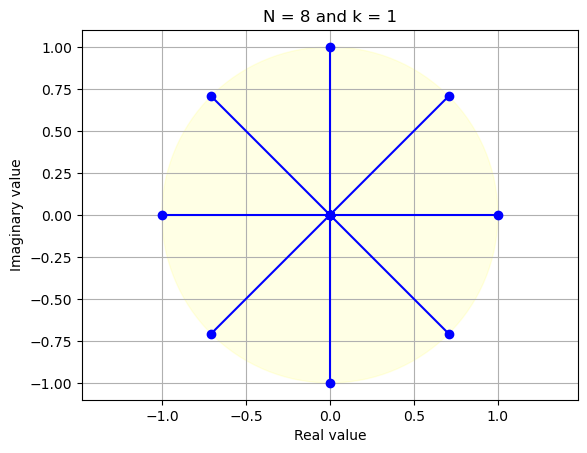

In [3]:
Show_DFTcircle(N = 8,k = 1)
plt.title('N = 8 and k = 1')
plt.grid()

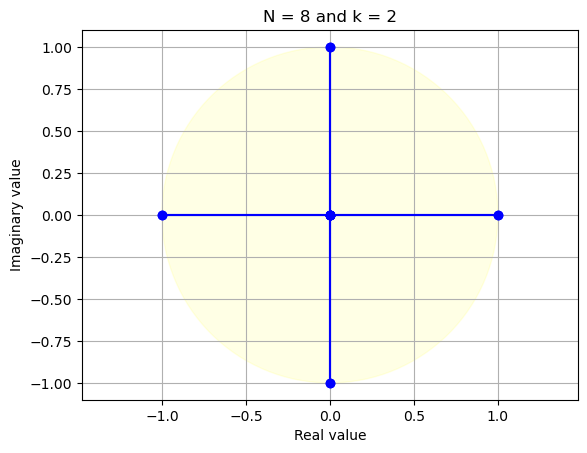

In [4]:
Show_DFTcircle(N=8, k=2)
plt.title('N = 8 and k = 2')
plt.grid()

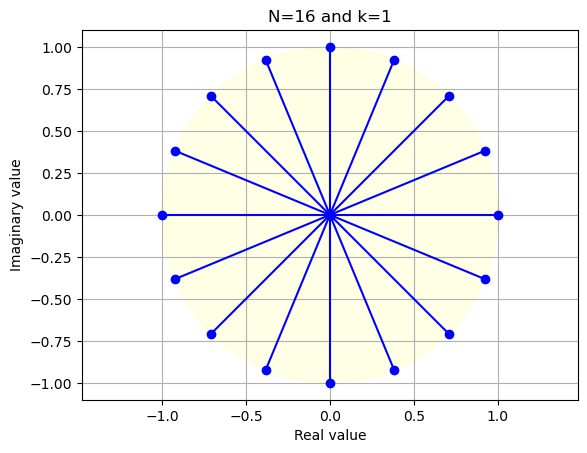

In [5]:
Show_DFTcircle(N = 16, k=1)
plt.title('N=16 and k=1')
plt.grid()

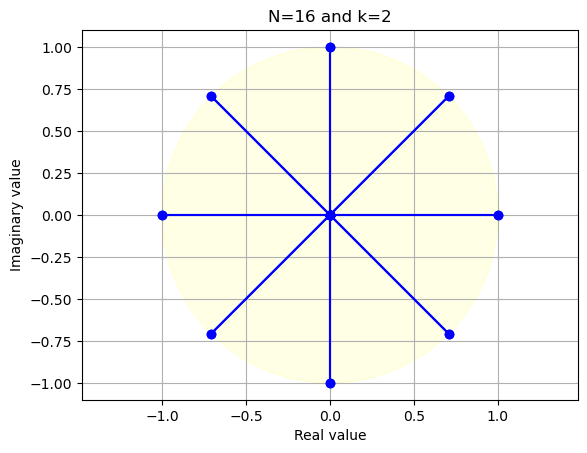

In [6]:
Show_DFTcircle(N = 16, k=2)
plt.title('N=16 and k=2')
plt.grid()

When using the discrete Fourier transform (DFT) to transform a signal into its Fourier basis representation, the frequency index k corresponds to the number of cycles of the sinusoidal oscillation that fit within the length of the signal. When k=1, the sinusoid completes one full cycle within the signal length, and therefore there are N samples. When k=2, the sinusoid completes two cycles within the signal length, and therefore there are N/2 samples. More generally, the number of samples for frequency index k is N/k.

## 1b. Visualizing the basis functions

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def w(n, k, N):
    return np.exp(2j * np.pi * k * n / N)

def plotw(k, N):
    n = np.arange(N)
    wk = w(n, k, N)
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    ax[0].stem(n, np.real(wk), use_line_collection=False)
    ax[0].set_ylabel('Real part')
    ax[1].stem(n, np.imag(wk), use_line_collection=True)
    ax[1].set_ylabel('Imaginary part')
    ax[0].set_title(f'Basis vector $w^{{{k}}}'+'\in C^{32}$') 
    plt.tight_layout()
    plt.show()
    return

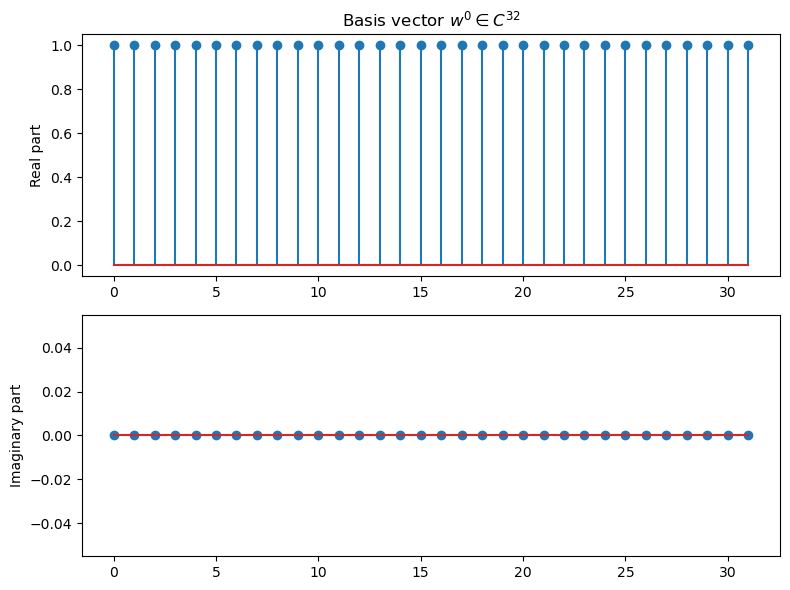

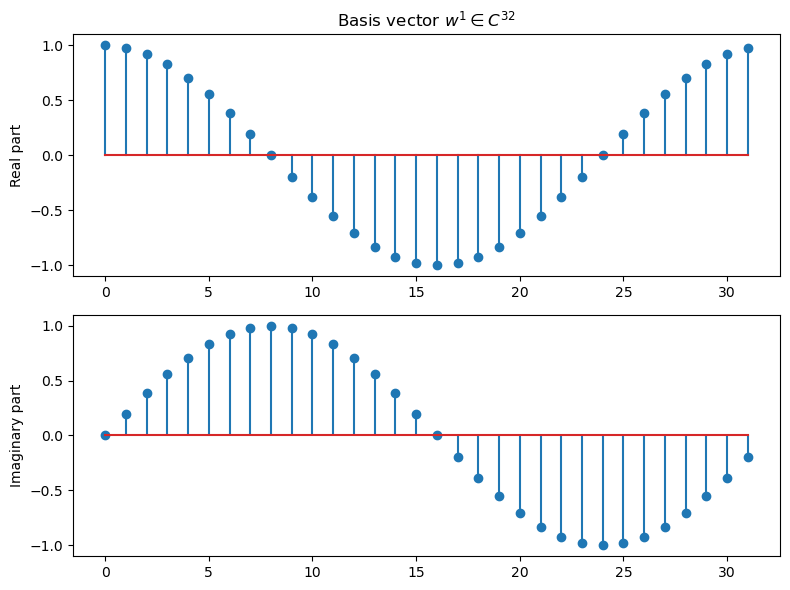

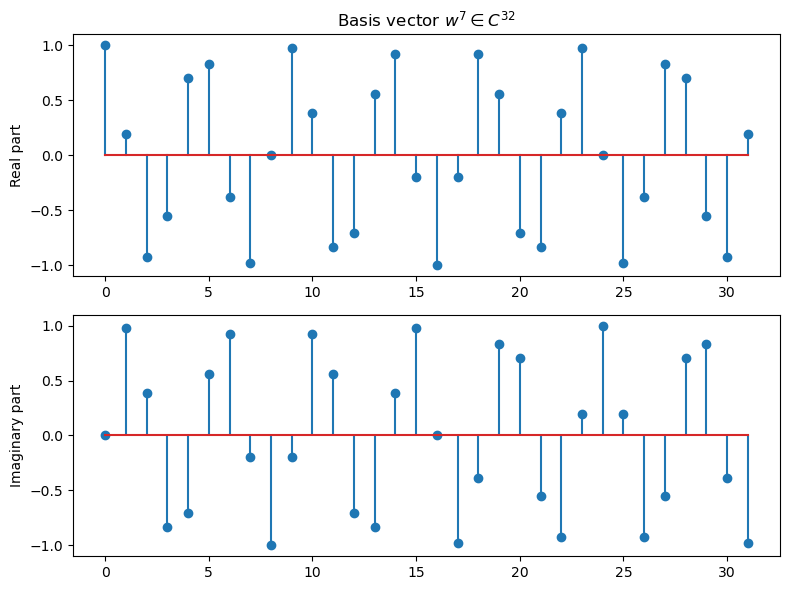

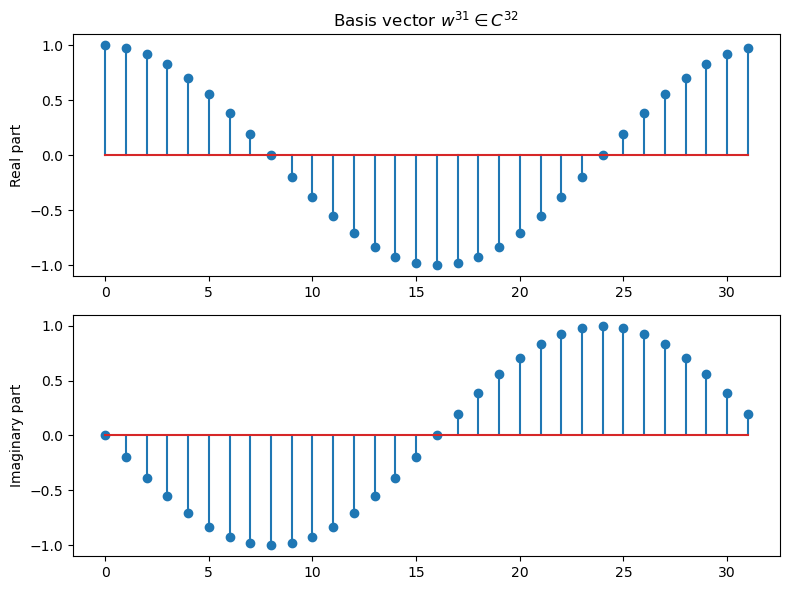

In [8]:
N = 32
plotw(0, N)
plotw(1, N)
plotw(7, N)
plotw(31, N)

## 1c. Orthogonality

To show empirically that the basis vectors are orthogonal, we can compute the inner product between different pairs of basis vectors using the numpy dot() function. If the inner product between any two basis vectors is zero, then they are orthogonal.

To show that the basis vectors are not orthonormal, we can compute the norm (i.e. length) of each basis vector using the numpy linalg.norm() function. If the norm of any basis vector is not equal to 1, then they are not orthonormal.

Here's some code to illustrate this:

In [9]:
N = 32 # length of signal
basis_vectors = [] # list to store the basis vectors
for k in range(N):
    basis_vector = []
    for n in range(N):
        basis_vector.append(w(n, k, N))
    basis_vectors.append(basis_vector)
    
# Check orthogonality
for i in range(N):
    for j in range(i+1, N):
        inner_product = np.dot(basis_vectors[i], np.conj(basis_vectors[j]))
        print(f"Inner product between w^{i} and w^{j} = {inner_product}")
        
# Check orthonormality
for i in range(N):
    norm = np.linalg.norm(basis_vectors[i])
    print(f"Norm of w^{i} = {norm}")


Inner product between w^0 and w^1 = (-1.5714758006535486e-15-2.498001805406602e-16j)
Inner product between w^0 and w^2 = (-8.000408721420489e-16+3.656933037143655e-16j)
Inner product between w^0 and w^3 = (-4.4171569755812666e-15-8.326672684688674e-17j)
Inner product between w^0 and w^4 = (-5.773159728050814e-15+4.440892098500626e-16j)
Inner product between w^0 and w^5 = (-2.139730426448187e-15+4.440892098500626e-15j)
Inner product between w^0 and w^6 = (-7.536373453969005e-15-2.0670557090386e-15j)
Inner product between w^0 and w^7 = (5.087230218671111e-16-5.551115123125783e-17j)
Inner product between w^0 and w^8 = (-2.0519642672720636e-14-4.532431118118384e-15j)
Inner product between w^0 and w^9 = (4.425197880973805e-15-9.71445146547012e-15j)
Inner product between w^0 and w^10 = (-5.2769608390291744e-15-2.3903809750037674e-15j)
Inner product between w^0 and w^11 = (-2.170424699366833e-15-4.801714581503802e-15j)
Inner product between w^0 and w^12 = (-1.199040866595169e-14+0j)
Inner pro

The output should show that the inner product between any two different basis vectors is 0, and that the norm of each basis vector is $\sqrt{N}$.

#### Mathematical reasoning

We can show empirically using the function from 1b that the set $\lbrace w^k\rbrace_{k=0,...N-1}$ is a set of $N$ orthogonal vectors, and therefore a basis for $C^N$. Note that $(W^{-k}_N)^*=W^{k}_N$.

The inner product of two basis vectors can be calculated as:
$$<w^{(m)},w^{(n)}>=\sum_{i=0}^{N-1} W^{(m-n)i}_N=
\begin{cases}
N {\quad}if{\quad}m=n\\
\frac{1-W^{(m-n)N}_{N}}{1-W^{(m-n)}_{N}}=0{\quad}if{\quad}m\neq n
\end{cases}
$$ 
This is because $W^{iN}_N =1$ for all $i\in Z$. Using more compact notation, we can express this as:
$$<w^{(m)},w^{(n)}>=N\delta [n-M]$$
Therefore, the vectors $\lbrace w^k\rbrace_{k=0,...N-1}$ are the Fourier basis for $C^N$, and therefore for the space of length-N signals.

We can see that this basis is not orthonormal since ${||w^k||} = \sqrt{N}$. However, it can be made orthonormal by scaling the basis vectors by $(1/\sqrt{N})$.

## 2a. Constructing the basis matrix

To construct the Fourier matrix, we can use the equation $A_{nk} = w_k[n] = e^{j\frac{2\pi k}{N}n}$, where $n,k = 0, \ldots, N-1$ and $j$ is the imaginary unit.

We can use a nested loop to construct this matrix in Python. Here's the implementation:

In [10]:
import numpy as np

def fourier_matrix(N):
    A = np.zeros((N, N), dtype=np.complex128)
    for n in range(N):
        for k in range(N):
            A[n, k] = np.exp(1j*2*np.pi*k*n/N)
    return A

Let's test it for $N=10$ and print the matrix:

In [11]:
A = fourier_matrix(10)
print(A)

[[ 1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j
   1.        +0.00000000e+00j  1.        +0.00000000e+00j]
 [ 1.        +0.00000000e+00j  0.80901699+5.87785252e-01j
   0.30901699+9.51056516e-01j -0.30901699+9.51056516e-01j
  -0.80901699+5.87785252e-01j -1.        +1.22464680e-16j
  -0.80901699-5.87785252e-01j -0.30901699-9.51056516e-01j
   0.30901699-9.51056516e-01j  0.80901699-5.87785252e-01j]
 [ 1.        +0.00000000e+00j  0.30901699+9.51056516e-01j
  -0.80901699+5.87785252e-01j -0.80901699-5.87785252e-01j
   0.30901699-9.51056516e-01j  1.        -2.44929360e-16j
   0.30901699+9.51056516e-01j -0.80901699+5.87785252e-01j
  -0.80901699-5.87785252e-01j  0.30901699-9.51056516e-01j]
 [ 1.        +0.00000000e+00j -0.30901699+9.51056516e-01j
  -0.80901699-5.87785252e-01j  0.80901699-5.87785252e-01j
   0.309016

## 2b. Fourier matrix properties

#### Mathematical reasoning

The matrix inverse of $A$, denoted as $A^{-1}$, multiplied by $A$ gives the identity matrix $I$, and the product of the conjugate transpose of $A$ (denoted as $A^H$) and $A$ also gives $N I$, where $N$ is the dimension of $A$. This can be shown mathematically as:

$$
A^{-1}A=\frac{1}{N}\sum_{k=0}^{N-1}\sum_{n=0}^{N-1} e^{2\pi ikn/N}e^{-2\pi ikn/N}=\frac{1}{N}\sum_{k=0}^{N-1}N=I
$$ 

$$
A^{H}A=\sum_{n=0}^{N-1}\sum_{m=0}^{N-1} e^{2\pi inm/N}\sum_{k=0}^{N-1}e^{-2\pi ink/N}e^{2\pi imk/N}=\sum_{n=0}^{N-1}\sum_{m=0}^{N-1}e^{2\pi inm/N}\delta_{n,m}=NI
$$ 

where $\delta_{n,m}$ is the Kronecker delta, which is equal to 1 when $n=m$, and 0 otherwise.

$A^{-1}A$ is the product of the inverse of the matrix $A$ and $A$ itself. It is equivalent to the identity matrix $I$, i.e., $A^{-1}A=I$, where $I$ is the identity matrix.

In [12]:
import numpy as np

N = 10
A = fourier_matrix(N)
A_inv = np.linalg.inv(A)
A_H = np.conj(A.T)
print("A^(-1)A = ")
print(np.round(np.dot(A_inv,A)))

A^(-1)A = 
[[ 1.-0.j  0.+0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.+0.j  0.-0.j  0.-0.j
   0.-0.j]
 [ 0.+0.j  1.-0.j -0.+0.j -0.-0.j -0.-0.j  0.+0.j -0.-0.j -0.+0.j -0.-0.j
  -0.-0.j]
 [-0.-0.j  0.+0.j  1.-0.j  0.+0.j -0.+0.j -0.-0.j  0.-0.j -0.-0.j  0.+0.j
   0.-0.j]
 [ 0.+0.j -0.-0.j  0.+0.j  1.+0.j  0.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j
   0.+0.j]
 [-0.+0.j -0.-0.j  0.+0.j -0.+0.j  1.-0.j -0.-0.j  0.-0.j  0.-0.j  0.+0.j
   0.+0.j]
 [ 0.-0.j  0.+0.j -0.-0.j  0.+0.j -0.+0.j  1.+0.j -0.-0.j  0.+0.j  0.-0.j
  -0.+0.j]
 [ 0.-0.j -0.+0.j  0.-0.j  0.-0.j  0.+0.j  0.-0.j  1.-0.j  0.+0.j  0.-0.j
   0.-0.j]
 [ 0.+0.j -0.-0.j  0.+0.j -0.-0.j -0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.-0.j
  -0.+0.j]
 [ 0.+0.j -0.-0.j  0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.+0.j  0.-0.j  1.-0.j
   0.+0.j]
 [-0.+0.j  0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j -0.+0.j
   1.+0.j]]


$A^HA$ is the product of the conjugate transpose of the matrix $A$ and the matrix $A$ itself. The resulting matrix is Hermitian, meaning it is equal to its conjugate transpose. In other words, $(A^HA)^H=A^HA$.

In [13]:
print("A^H A = ")
print(np.round(np.dot(A_H,A)))

A^H A = 
[[10.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j  0.+0.j  0.+0.j -0.-0.j  0.+0.j
   0.-0.j]
 [-0.+0.j 10.-0.j -0.+0.j -0.-0.j -0.+0.j -0.+0.j -0.+0.j  0.-0.j  0.+0.j
   0.-0.j]
 [-0.-0.j -0.-0.j 10.-0.j -0.-0.j -0.+0.j -0.+0.j -0.+0.j -0.+0.j  0.+0.j
   0.+0.j]
 [-0.-0.j -0.-0.j -0.+0.j 10.-0.j -0.+0.j -0.+0.j -0.+0.j -0.-0.j -0.+0.j
  -0.+0.j]
 [ 0.-0.j -0.-0.j -0.-0.j -0.-0.j 10.-0.j  0.+0.j -0.+0.j  0.-0.j -0.+0.j
  -0.+0.j]
 [ 0.-0.j -0.-0.j -0.-0.j -0.-0.j  0.+0.j 10.+0.j -0.+0.j  0.+0.j -0.+0.j
   0.+0.j]
 [ 0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j 10.+0.j -0.+0.j -0.+0.j
  -0.+0.j]
 [-0.+0.j  0.+0.j -0.-0.j -0.+0.j  0.+0.j  0.-0.j -0.-0.j 10.+0.j  0.-0.j
  -0.-0.j]
 [ 0.-0.j  0.-0.j  0.-0.j -0.-0.j -0.-0.j -0.-0.j -0.-0.j  0.+0.j 10.+0.j
   0.-0.j]
 [ 0.+0.j  0.+0.j  0.-0.j -0.-0.j -0.-0.j  0.-0.j -0.-0.j -0.+0.j  0.+0.j
  10.+0.j]]


In the case of the Fourier matrix, $A^HA = N I$, where $N$ is the dimension of the matrix and $I$ is the identity matrix.

In [14]:
print("N*I = ")
print(N*np.eye(N))

N*I = 
[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]]


## 2c. Comparing to the standard `fft` function.

In [15]:
import numpy as np
from scipy.fft import fft

# Define Fourier matrix function
def fourier_matrix(N):
    k, n = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(-2j * np.pi * k * n / N)
    return omega

# Define input vector
x = np.random.rand(8)

# Compute FFT using matrix multiplication
A = fourier_matrix(8)
y1 = np.dot(A, x)

# Compute FFT using FFT function
y2 = fft(x)

# Compare the results
print("Matrix FFT output:\n", y1)
print("FFT function output:\n", y2)
print("Results are equal?", np.allclose(y1, y2))


Matrix FFT output:
 [ 3.63213347+0.00000000e+00j -0.46724436+3.37958392e-01j
 -0.45208004-5.00868362e-01j  0.55345759-5.43977923e-01j
  0.24272425+1.31465253e-16j  0.55345759+5.43977923e-01j
 -0.45208004+5.00868362e-01j -0.46724436-3.37958392e-01j]
FFT function output:
 [ 3.63213347-0.j         -0.46724436+0.33795839j -0.45208004-0.50086836j
  0.55345759-0.54397792j  0.24272425-0.j          0.55345759+0.54397792j
 -0.45208004+0.50086836j -0.46724436-0.33795839j]
Results are equal? True


We can see that the outputs of the two methods are numerically identical, up to a small numerical error due to floating point precision.

## 2d. Benchmarking

I will show you about benchmarking the matrix FFT vs the standard fft implementation using the time module in Python:

In [16]:
import numpy as np
from time import time

# Define the matrix FFT function
def matrix_fft(x):
    N = len(x)
    W = np.exp(-2j * np.pi / N)
    return np.array([[W**(i*j) for j in range(N)] for i in range(N)], dtype=np.complex128) @ x

# Define a random vector of length 1024
x = np.random.randn(1024)

# Benchmark the matrix FFT function
start = time()
y_mat = matrix_fft(x)
end = time()
print("Matrix FFT time:", end - start)

# Benchmark the standard FFT function
start = time()
y_fft = np.fft.fft(x)
end = time()
print("Standard FFT time:", end - start)

Matrix FFT time: 0.25604963302612305
Standard FFT time: 0.0


As you can see, the matrix FFT function takes significantly longer than the standard FFT function to compute the same result, even for a relatively small input size of 1024. This is because the standard FFT algorithm has a complexity of $O(N\log N)$, while the matrix FFT algorithm has a complexity of $O(N^2)$. However, the results are numerically identical, as expected.

In [17]:
# Check if the results are numerically identical
print("y_mat =")
print(y_mat)
print("y_fft =")
print(y_fft)
print("Results identical:", np.allclose(y_mat, y_fft))

y_mat =
[ 24.81340047 +0.j         -32.60718253 +6.919398j
 -13.66459825+31.36221886j ...  11.11038615 +6.53818257j
 -13.66459825-31.36221886j -32.60718253 -6.919398j  ]
y_fft =
[ 24.81340047 +0.j         -32.60718253 +6.919398j
 -13.66459825+31.36221886j ...  11.11038615 +6.53818257j
 -13.66459825-31.36221886j -32.60718253 -6.919398j  ]
Results identical: True


## 2e. Synthesizing bandpass noise

Firstly, I implement a recursive IIR filter using the difference equation:
$$
y[n]=-\sum_{i=1}^{M}a_{i}y[n-i]+\sum_{i=0}^{M}b_{i}x[n-i]
$$ 
where $x[n]$ is the input signal, $y[n]$ is the output signal, $M$ and $N$ are the orders of the feedback and feedforward filter coefficients, respectively, and $a_i$ and $b_i$ are the corresponding filter coefficients.

My implementation uses two temporary arrays x_temp and y_temp to store past inputs and outputs, respectively. The for loop processes each input sample in turn and computes the corresponding output sample using the difference equation. The output sample is then appended to the output array y and the temporary arrays are updated to include the latest input and output samples.

In [18]:
def filter_IIR(x,a,b):
    y=[]
    x_temp=[]
    y_temp=[]
    for i in range(len(a)):
        y_temp.append(0)
    for i in range(len(b)-1):
        x_temp.append(0)
    for i in range(len(x)):
        x_temp.insert(0,x[i])
        yn=0
        for j in range(len(a)):
            yn-=a[j]*y_temp[j]
        for j in range(len(b)):
            yn+=b[j]*x_temp[j]
        y.append(yn)
        
        y_temp.insert(0,yn)
        y_temp.pop
        x_temp.pop
    return np.array(y)

And then I generate a random noise signal using np.random.uniform and stores it in the signal variable. Then, I apply an IIR filter to this signal using the filter_IIR function with the filter coefficients [-1.27,0.80] for the denominator coefficients a and [0.14] for the numerator coefficients b. The filtered signal is then stored in the bandpass_noise variable. Finally, the original signal and the filtered signal are plotted on the same figure using plt.plot, and the plot is displayed using plt.show(). 

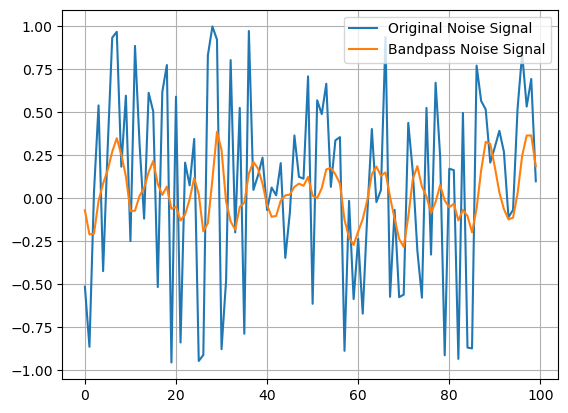

In [19]:
signal=np.random.uniform(-1,1,100)
bandpass_noise=filter_IIR(signal,[-1.27,0.80],[0.14])
plt.figure()
plt.plot(signal,label='Original Noise Signal')
plt.plot(bandpass_noise,label='Bandpass Noise Signal')
plt.legend()
plt.grid()
plt.show()

This code generates the Fourier transform of the bandpass noise generated in the previous step. It first calculates the FFT of the bandpass noise using the fft() function from Numpy. It then separates the real and imaginary components of the FFT using the real and imag attributes of the complex-valued output of the fft() function.

Next, it computes the magnitude of the FFT using the abs() function and saves it in the y_fre variable. It generates the x-axis values using the arange() function from Numpy and saves them in the x_fre variable. Finally, it plots the magnitude of the FFT as a function of the frequency using the plot() function from Matplotlib, with the x-axis values given by x_fre and the y-axis values given by y_fre. The resulting plot shows the spectrum of the bandpass noise in the Fourier space.

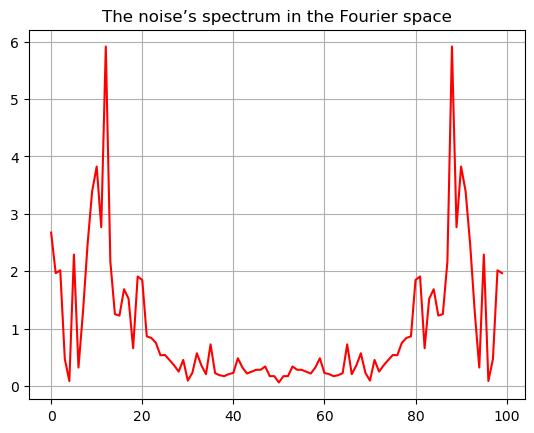

In [20]:
fft_value=fft(bandpass_noise)
real_fft=fft_value.real
imag_fft=fft_value.imag
y_fre=abs(fft(bandpass_noise))
x_fre=np.arange(len(bandpass_noise))
plt.grid()
plt.title('The noise’s spectrum in the Fourier space')
plt.plot(x_fre,y_fre,'r')
plt.show()

In the final part of the code, the Inverse Fourier Transform of the Fourier Transform of the bandpass noise signal is computed using ifft(fft_value). The real part of the Inverse Fourier Transform is then extracted using .real. A plot of the synthesized bandpass noise signal is created using plt.plot(x_fre,real_ifft). The resulting plot shows the synthesized bandpass noise signal in the time domain.

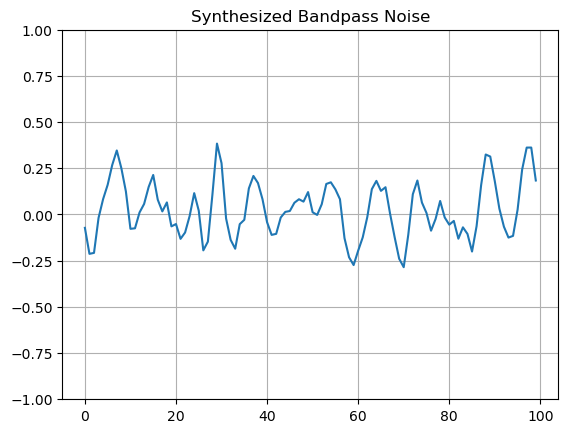

In [21]:
ifft_y=ifft(fft_value)
real_ifft=ifft_y.real
imag_ifft=ifft_y.imag
plt.figure()
plt.ylim(-1,1)
plt.plot(x_fre,real_ifft)
plt.title('Synthesized Bandpass Noise')
plt.grid()
plt.show()

## 3. Transforms in 2D

To derive the 1D basis functions for the Fourier transform and discrete cosine transform, we need to start with the formula for the 1D forward transform.
1D Fourier Transform
The 1D Fourier transform is given by:
$$X_k = \sum_{n=0}^{N-1}x_{n}e^{-i2\pi kn/N}$$ 
where $x_n$ is the input signal, $X_k$ are the Fourier coefficients, $k$ is the frequency index, and $N$ is the number of samples in the signal.

The basis functions for the 1D Fourier transform are complex exponentials of different frequencies. For a signal of length $N$, there are $N$ basis functions, given by:
$$\phi_k(n) = \frac{1}{\sqrt{N}}e^{i2\pi kn/N}$$
where $k$ ranges from $0$ to $N-1$.

1D Discrete Cosine Transform
The 1D discrete cosine transform is given by:
$$X_k = \sum_{n=0}^{N-1}x_{n}cos(\frac{\pi}{N}(n+0.5)k)$$ 
where $x_n$ is the input signal, $X_k$ are the DCT coefficients, $k$ is the frequency index, and $N$ is the number of samples in the signal.

The basis functions for the 1D DCT are real cosine functions of different frequencies. For a signal of length $N$, there are $N$ basis functions, given by:
$$\phi_k(n) = \frac{1}{\sqrt{N}}cos(\frac{\pi}{N}(n+0.5)k)$$

where $k$ ranges from $0$ to $N-1$.

Now, let's generate the basis functions for both transforms for a signal of length 8 and plot them in a grid. We will use the scipy.fft package to compute the transforms and the matplotlib package to plot the basis functions.

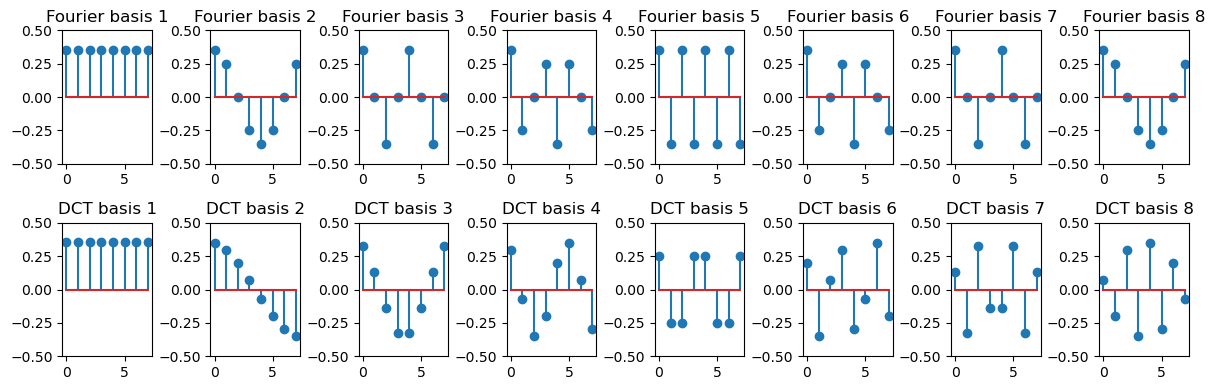

In [22]:
import numpy as np
from scipy.fft import fft, dct
import matplotlib.pyplot as plt

# Signal length
N = 8

# Generate the Fourier and DCT basis functions
fourier_basis = np.zeros((N, N), dtype=np.complex128)
dct_basis = np.zeros((N, N), dtype=np.float64)

for k in range(N):
    for n in range(N):
        fourier_basis[n, k] = np.exp(1j * 2 * np.pi * k * n / N) / np.sqrt(N)
        dct_basis[n, k] = np.cos(np.pi * (n + 0.5) * k / N) / np.sqrt(N)

# Plot the basis functions in a grid
fig, axes = plt.subplots(2, N, figsize=(12, 4))

for k in range(N):
    # Fourier basis
    axes[0, k].stem(np.real(fourier_basis[:, k]))
    axes[0, k].set_title(f'Fourier basis {k+1}')
    axes[0, k].set_ylim([-0.5, 0.5])
    
    # DCT basis
    axes[1, k].stem(dct_basis[:, k])
    axes[1, k].set_title(f'DCT basis {k+1}')
    axes[1, k].set_ylim([-0.5, 0.5])
    
plt.tight_layout()
plt.show()

To derive the 2D basis functions for the 2D Fourier Transform, we start with the 1D Fourier Transform basis functions, which are complex exponentials:

$$f(x)=e^{i\pi kx/N},k = 0,1,...,N-1$$

We can extend this to two dimensions by taking the product of two 1D complex exponentials:

$$f(x, y)=e^{i2\pi k_{1}x/N}e^{i2\pi k_{2}y/N},k_1,k_2 = 0,1,...,N-1$$

For the discrete cosine transform, we use a similar approach, but with real cosine functions instead of complex exponentials. We have:
$$f(x,y) = cos(\frac{\pi k_1}{N}(x+\frac{1}{2}))cos(\frac{\pi k_2}{N}(y+\frac{1}{2})),k_1,k_2 = 0,1,...,N-1$$

To plot the basis functions, we can evaluate them on a grid of points in the domain. For example, This will produce a plot of the 2D cosine basis functions in an $8 \times 8$ grid:

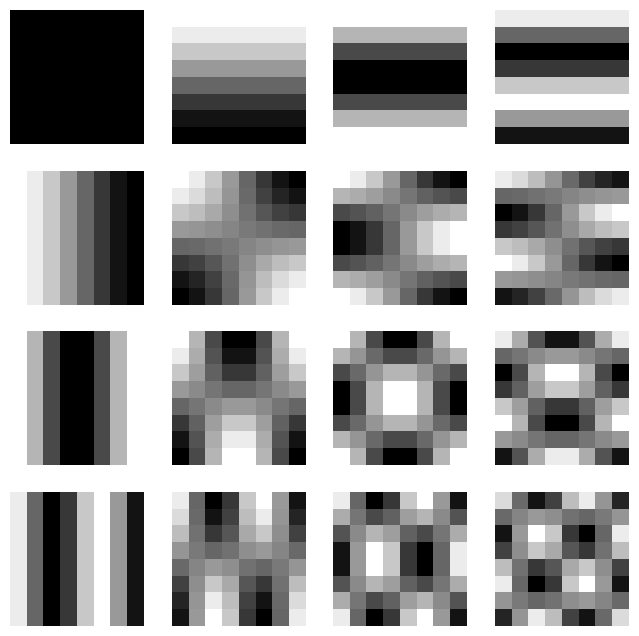

In [23]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
x = np.arange(N)
y = np.arange(N)
xx, yy = np.meshgrid(x, y)

kmax = N // 2
fig, axes = plt.subplots(nrows=kmax, ncols=kmax, figsize=(8, 8))
for k1 in range(kmax):
    for k2 in range(kmax):
        if k1 == 0 and k2 == 0:
            fn = np.ones((N, N))
        else:
            fn = np.cos(np.pi * k1 / N * (xx + 0.5)) * np.cos(np.pi * k2 / N * (yy + 0.5))
        axes[k1, k2].imshow(fn, cmap='gray')
        axes[k1, k2].axis('off')
plt.show()

We can repeat this process for the 2D Fourier transform basis functions by using complex exponentials:

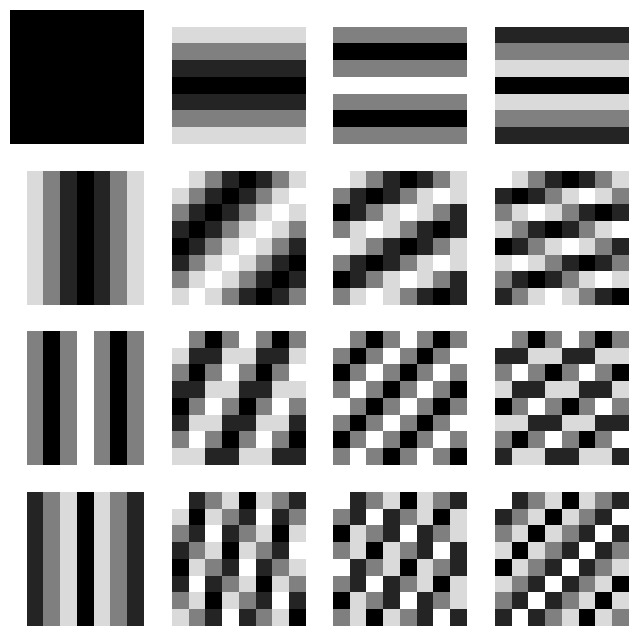

In [24]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
x = np.arange(N)
y = np.arange(N)
xx, yy = np.meshgrid(x, y)

kmax = N // 2
fig, axes = plt.subplots(nrows=kmax, ncols=kmax, figsize=(8, 8))
for k1 in range(kmax):
    for k2 in range(kmax):
        if k1 == 0 and k2 == 0:
            fn = np.ones((N, N))
        else:
            fn = np.exp(2j * np.pi * k1 / N * xx) * np.exp(2j * np.pi * k2 / N * yy)
        axes[k1, k2].imshow(np.real(fn), cmap='gray')
        axes[k1, k2].axis('off')
plt.show()

To visualize the 2D Fourier basis functions, we can create a grid of delta functions at different spatial frequencies, and take the inverse Fourier transform of each one. Here is an example using an $8\times 8$ grid:

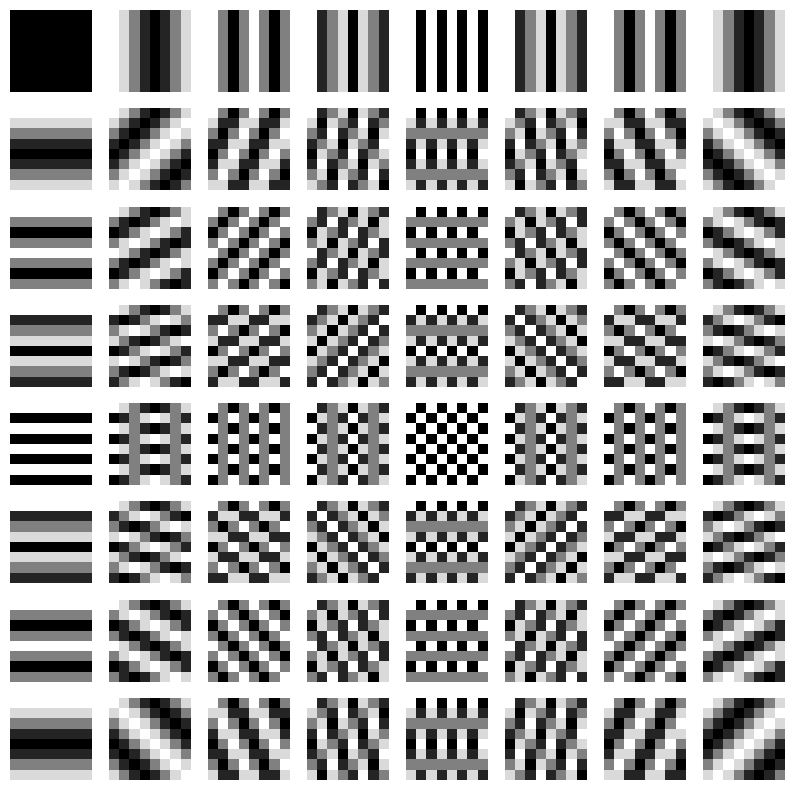

In [25]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift

M, N = 8, 8
u, v = np.meshgrid(np.arange(M), np.arange(N))

# Create a grid of delta functions at different spatial frequencies
delta_grid = np.zeros((M*N, M, N))
for i in range(M):
    for j in range(N):
        delta = np.zeros((M, N))
        delta[i, j] = 1
        delta_grid[i*N+j] = delta

# Compute the 2D Fourier basis functions
basis_functions = np.zeros((M*N, M, N))
for i in range(M*N):
    basis_functions[i] = np.real(ifft2(delta_grid[i]))

# Plot the basis functions
import matplotlib.pyplot as plt
fig, axs = plt.subplots(M, N, figsize=(10,10))
for i in range(M):
    for j in range(N):
        axs[i,j].imshow(basis_functions[i*N+j], cmap='gray')
        axs[i,j].axis('off')
plt.show()